# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
Temp = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Latitude = []
Longitude = []
CityID = []
City = []
LatLong = []
CountryCode = []

for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        Temp.append(response['main']['temp'])
        Cloudiness.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        CityID.append(response['id'])
        City.append(response['name'])
        MaxTemp.append(response['main']['temp_max'])
        LatLong.append(response['coord'])
        CountryCode.append(response['sys']['country'])
        print(f"processing City {city} CityID: {response['id']}")

processing City aykhal CityID: 2027296
processing City punta arenas CityID: 3874787
processing City camacha CityID: 2270385
processing City new norfolk CityID: 2155415
processing City rikitea CityID: 4030556
processing City bluff CityID: 2206939
processing City yellowknife CityID: 6185377
processing City busselton CityID: 2075265
processing City srednekolymsk CityID: 2121025
processing City clyde river CityID: 5924351
processing City butaritari CityID: 2110227
processing City omboue CityID: 2396853
processing City albany CityID: 5106841
processing City ushuaia CityID: 3833367
processing City jamestown CityID: 5122534
processing City leningradskiy CityID: 2123814
processing City dikson CityID: 1507390
processing City hobart CityID: 2163355
processing City mar del plata CityID: 3430863
processing City bambous virieux CityID: 1106677
processing City georgetown CityID: 1735106
processing City havoysund CityID: 779622
processing City vila franca do campo CityID: 3372472
processing City mata

processing City hasaki CityID: 2112802
processing City atasu CityID: 1526041
processing City souillac CityID: 933995
processing City ancud CityID: 3899695
processing City tianpeng CityID: 1792916
processing City pontes e lacerda CityID: 3453060
processing City cape town CityID: 3369157
processing City stanisic CityID: 3190042
processing City garissa CityID: 197745
processing City neijiang CityID: 1799491
processing City rudnogorsk CityID: 2017378
processing City talnakh CityID: 1490256
processing City muisne CityID: 3653967
processing City isangel CityID: 2136825
processing City tuy hoa CityID: 1563281
processing City novyy urengoy CityID: 1496511
processing City soyo CityID: 2236967
processing City davila CityID: 1715335
processing City deputatskiy CityID: 2028164
processing City abha CityID: 110690
processing City la ronge CityID: 6050066
processing City hearst CityID: 5973108
processing City aswan CityID: 359792
processing City goundam CityID: 2456917
processing City kruisfontein Ci

processing City collie CityID: 2074113
processing City yuzhnyy CityID: 1485627
processing City airai CityID: 1651810
processing City lamar CityID: 4705086
processing City revda CityID: 502011
processing City hudson bay CityID: 5978133
processing City lavrentiya CityID: 4031637
processing City rafraf CityID: 2467813
processing City castro CityID: 3466704
processing City padang CityID: 1633419
processing City wattegama CityID: 1224061
processing City pajapan CityID: 3522186
processing City masterton CityID: 2206890
processing City broken hill CityID: 2173911
processing City portland CityID: 5746545
processing City kaitangata CityID: 2208248
processing City barra do garcas CityID: 3470709
processing City champerico CityID: 3598787
processing City naryan-mar CityID: 523392
processing City broome CityID: 5110365
processing City sungai padi CityID: 1606050
processing City berlevag CityID: 780687
processing City bilibino CityID: 2126682
processing City bograd CityID: 1509847
processing City s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'CityID' : CityID,
                    'City' : City,
                    'Humidity' : Humidity,
                    'Temp' : Temp,
                    'Latitude' : Latitude,
                    'Cloudiness' : Cloudiness,
                    'WindSpeed' : WindSpeed,
                    'MaxTemp' : MaxTemp,
                    'Longitude' : Longitude,
                     'LatLong' : LatLong,
                     'CountryCode' : CountryCode
                       })


In [5]:
city_df

city_df.to_csv('city_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

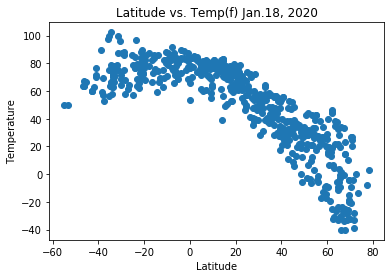

<Figure size 432x288 with 0 Axes>

In [6]:
x_values = city_df['Latitude']
y_values = city_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temp(f) Jan.18, 2020')
plt.show()
plt.savefig('Lat v Temp.png')

#### Latitude vs. Humidity Plot

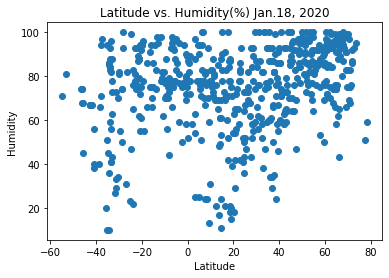

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(%) Jan.18, 2020')
plt.show()
plt.savefig('Lat v Hum.png')

#### Latitude vs. Cloudiness Plot

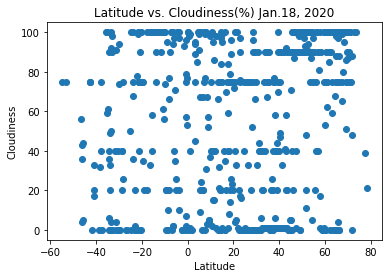

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = city_df['Latitude']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness(%) Jan.18, 2020')
plt.show()
plt.savefig('Lat v Cloud.png')

#### Latitude vs. Wind Speed Plot

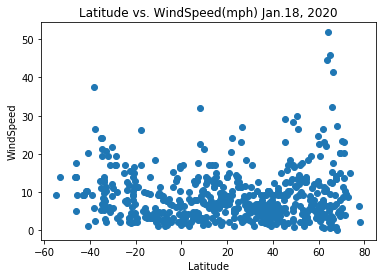

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = city_df['Latitude']
y_values = city_df['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title('Latitude vs. WindSpeed(mph) Jan.18, 2020')
plt.show()
plt.savefig('Lat v Wind.png')

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemi_df = city_df[city_df['Latitude']>0]
SouthHemi_df = city_df[city_df['Latitude']<0]

NorthHemi_df.head()
SouthHemi_df.head()

,CityID,City,Humidity,Temp,Latitude,Cloudiness,WindSpeed,MaxTemp,Longitude,LatLong,CountryCode
1,3874787,Punta Arenas,81,50.00,-53.15,75,13.87,50.00,-70.92,"{'lon': -70.92, 'lat': -53.15}",CL
3,2155415,New Norfolk,67,60.24,-42.78,75,9.17,62.60,147.06,"{'lon': 147.06, 'lat': -42.78}",AU
4,4030556,Rikitea,76,79.30,-23.12,2,11.79,79.30,-134.97,"{'lon': -134.97, 'lat': -23.12}",PF
5,2206939,Bluff,74,64.00,-46.60,56,14.00,64.00,168.33,"{'lon': 168.33, 'lat': -46.6}",NZ
7,2075265,Busselton,41,71.65,-33.65,100,8.21,75.99,115.33,"{'lon': 115.33, 'lat': -33.65}",AU


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0       3.626729
2      46.861368
6       8.275897
8       1.722408
9      -2.243831
         ...    
561    54.281651
562    33.347260
563    52.639995
564    26.412907
566    68.268555
Name: Latitude, Length: 403, dtype: float64
y = -1.31x +90.31
The r-squared is: 0.7603334939665131


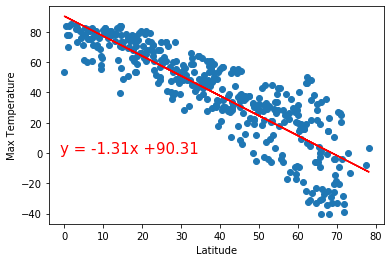

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-1,0),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('NH Temp Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      66.755498
3      69.767174
4      75.476871
5      68.657762
7      72.418727
         ...    
552    74.355842
554    79.812872
556    78.755735
557    78.015159
565    78.259114
Name: Latitude, Length: 164, dtype: float64
y = 0.29x +82.19
The r-squared is: 0.13935410305523535


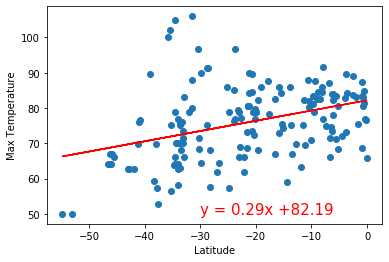

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('SH Temp Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      84.844033
2      73.812984
6      83.657826
8      85.329908
9      86.341869
         ...    
561    71.919745
562    77.261025
563    72.338604
564    79.030281
566    68.351074
Name: Latitude, Length: 403, dtype: float64
y = 0.34x +62.73
The r-squared is: 0.12913534738471644


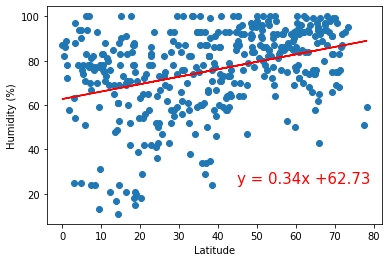

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('NH Hum Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      59.556930
3      64.020389
4      72.482453
5      62.376183
7      67.950126
         ...    
552    70.821030
554    78.908629
556    77.341899
557    76.244327
565    76.605880
Name: Latitude, Length: 164, dtype: float64
y = 0.43x +82.43
The r-squared is: 0.08671819108496738


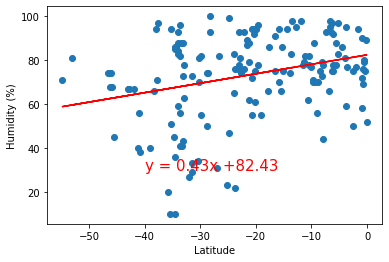

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('SH Hum Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      84.844033
2      73.812984
6      83.657826
8      85.329908
9      86.341869
         ...    
561    71.919745
562    77.261025
563    72.338604
564    79.030281
566    68.351074
Name: Latitude, Length: 403, dtype: float64
y = 0.34x +62.73
The r-squared is: 0.12913534738471644


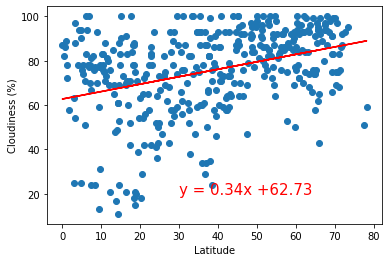

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('NH Cloud Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      36.320653
3      41.481319
4      51.265185
5      39.580283
7      46.024895
         ...    
552    49.344243
554    58.695151
556    56.883692
557    55.614676
565    56.032705
Name: Latitude, Length: 164, dtype: float64
y = 0.5x +62.77
The r-squared is: 0.03019913505960358


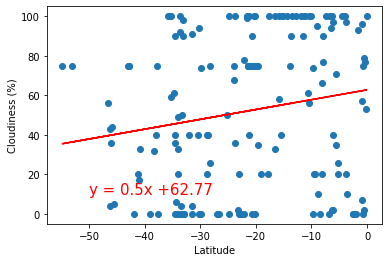

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('SH Cloud Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      10.212719
2       8.619729
6      10.041420
8      10.282885
9      10.429022
         ...    
561     8.346327
562     9.117659
563     8.406814
564     9.373157
566     7.830976
Name: Latitude, Length: 403, dtype: float64
y = 0.05x +7.02
The r-squared is: 0.02034189485538333


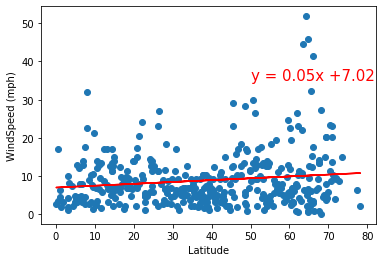

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('NH Wind Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      13.937272
3      12.358467
4       9.365286
5      12.940052
7      10.968450
         ...    
552     9.952960
554     7.092234
556     7.646414
557     8.034644
565     7.906757
Name: Latitude, Length: 164, dtype: float64
y = -0.15x +5.85
The r-squared is: 0.11346647321130383


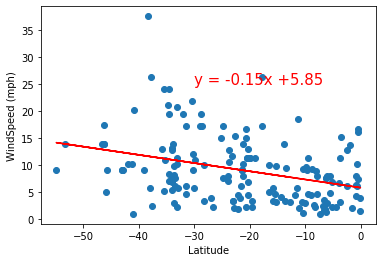

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('SH Wind Lat.png')